### 四月底24城市

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

#显示所有行

pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

import sys
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import warnings
import feather
warnings.filterwarnings("ignore")
import math
sys.path.append('/data/apps/modules/jupyter')
from helper.spark_helper import *
from helper.presto_helper import query_presto
from helper.csv_helper import *
from helper.pandas_helper import *
from helper.presto_helper import query_hive_wy

In [19]:
citys = ','.join([str(i) for i in sorted([388,62,401,332,179,373,281,329,231,613,295,294,379,
            219,132,195,155,143,495,428,298,83,163,87])])
citys

'62,83,87,132,143,155,163,179,195,219,231,281,294,295,298,329,332,373,379,388,401,428,495,613'

In [20]:
city_user_id_df=get_df_from_csv_table(query_presto(f"""select user_id,city_id,mobile from dim.dim_user_info_df where event_day='20210406' and city_id in ({citys})"""))
city_user_id_df.shape

(4411646, 3)

In [14]:
city_user_id_df['city_id'].value_counts()

87     378921
62     198086
388    151556
Name: city_id, dtype: int64

In [15]:
city_pic_df=get_df_from_csv_table(query_presto(f"""select user_id,city_id from dws.dws_pt_user_picture_da where event_day='20210406' and city_id in ({citys})"""))
city_pic_df.shape

(728563, 2)

In [16]:
city_pic_df['city_id'].value_counts()

87     378921
62     198086
388    151556
Name: city_id, dtype: int64

In [22]:
sample_df=city_user_id_df.sample(120000)

In [24]:
sample_df=sample_df.dropna().reset_index(drop=True)

In [25]:
sample_df

,user_id,city_id,mobile
0,45935035,195,13061878795
1,37441094,401,13927531956
2,31884193,163,15064153170
3,48140580,401,17827766590
4,22037346,298,15872342278
5,48799401,379,13610517804
6,27060580,298,13377731832
7,30173680,83,18807280099
8,21099850,179,18362674131
9,47217384,388,13860672919


In [26]:
sample_df['city_id'].value_counts()

87     10336
379     7741
401     7233
163     6867
132     6662
298     5994
231     5716
83      5662
195     5640
155     5543
428     5532
62      5484
294     5182
332     4582
179     4575
495     4470
388     4097
219     3603
373     3225
143     2848
295     2668
329     2498
613     2366
281     1476
Name: city_id, dtype: int64

In [28]:
sample_df.to_csv('sample_user_24_city.csv')

# 数据加载

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

#显示所有行

pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

import sys
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import warnings
import feather
warnings.filterwarnings("ignore")
import math
sys.path.append('/data/apps/modules/jupyter')
from helper.spark_helper import *
from helper.presto_helper import query_presto
from helper.csv_helper import *
from helper.pandas_helper import *
from helper.presto_helper import query_hive_wy

In [2]:
citys='196'
user_pref_df = get_df_from_csv_table(query_presto(f'''
    select city_id,user_id, cur_date, order_count_d,order_days_30d,if(order_days_30d>5,1,0) as pref
    from dws.dws_pt_user_picture_da
    where city_id in ({citys}) and event_day between '20210201' and '20210407'
''')).dropna()

In [3]:
detail_df=get_df_from_csv_table(query_presto(f'''
    select user_id,bike_sn,city_id
    from dwd.dwd_bd_order_detail_da
    where city_id=196 and event_day between '20210201' and '20210407'
'''))

In [4]:
user_pref_df.order_count_d.sum()

520290.0

In [5]:
detail_df.shape

(523897, 3)

In [8]:
merge_df=user_pref_df.merge(detail_df,on=['user_id','city_id'],how='inner')

In [9]:
merge_df.shape

(32599371, 7)

In [11]:
id_list=merge_df.drop_duplicates(subset='user_id')['user_id']

In [13]:
user_df=user_pref_df[user_pref_df.user_id.isin(id_list)]

In [14]:
detail_df2=detail_df[detail_df.user_id.isin(id_list)]

In [15]:
user_df.order_count_d.sum()

515988.0

In [16]:
detail_df2.shape

(518440, 3)

# 分组测试

In [17]:
u_df = get_df_from_csv_table(query_presto(f'''
    select event_day,city_id,user_id, cur_date, order_count_d,order_days_30d,if(order_days_30d>5,1,0) as pref
    from dws.dws_pt_user_picture_da
    where city_id in ({citys}) and event_day between '20210401' and '20210407'
''')).dropna()

In [18]:
d_df=get_df_from_csv_table(query_presto(f'''
    select user_id,bike_sn,city_id,event_day
    from dwd.dwd_bd_order_detail_da
    where city_id=196 and event_day between '20210401' and '20210407'
'''))

In [23]:
m_df=u_df.merge(d_df,on=['user_id','city_id','event_day'],how='inner')

In [28]:
t1=m_df.groupby(['user_id','event_day']).order_count_d.sum().reset_index()
t1.order_count_d.sum()

111877.0

In [27]:
t2=m_df.groupby(['user_id','event_day']).bike_sn.count().reset_index()
t2.bike_sn.sum()

48828

In [29]:
m_df

,event_day,city_id,user_id,cur_date,order_count_d,order_days_30d,pref,bike_sn
0,20210407,196,6659046,2021-04-07 00:00:00.000,1.0,16.0,1,815645579
1,20210407,196,6659332,2021-04-07 00:00:00.000,1.0,12.0,1,815653916
2,20210407,196,6852936,2021-04-07 00:00:00.000,1.0,19.0,1,812217242
3,20210407,196,6859361,2021-04-07 00:00:00.000,1.0,2.0,0,815648596
4,20210407,196,6882191,2021-04-07 00:00:00.000,1.0,13.0,1,802214219
5,20210407,196,6886225,2021-04-07 00:00:00.000,2.0,9.0,1,812210202
6,20210407,196,6886225,2021-04-07 00:00:00.000,2.0,9.0,1,802214100
7,20210407,196,6898777,2021-04-07 00:00:00.000,1.0,12.0,1,802211066
8,20210407,196,6905633,2021-04-07 00:00:00.000,1.0,11.0,1,802214515
9,20210407,196,6908121,2021-04-07 00:00:00.000,1.0,19.0,1,812211264


In [31]:
t1=m_df.drop_duplicates(subset=['event_day','user_id']).groupby(['user_id','event_day']).order_count_d.sum().reset_index()
t1.order_count_d.sum()

48845.0

In [32]:
t2=m_df.groupby(['user_id','event_day']).bike_sn.count().reset_index()
t2.bike_sn.sum()

48828

In [36]:
t1['order_count_d']=t1['order_count_d'].astype('int')
t1

,user_id,event_day,order_count_d
0,1758254,20210403,2
1,1758254,20210404,1
2,1758254,20210405,1
3,1758254,20210407,1
4,2044893,20210406,2
5,2325725,20210401,1
6,2342723,20210406,2
7,2344749,20210405,1
8,2346996,20210402,2
9,2346996,20210403,2


In [34]:
t2

,user_id,event_day,bike_sn
0,1758254,20210403,2
1,1758254,20210404,1
2,1758254,20210405,1
3,1758254,20210407,1
4,2044893,20210406,2
5,2325725,20210401,1
6,2342723,20210406,2
7,2344749,20210405,1
8,2346996,20210402,2
9,2346996,20210403,2


In [37]:
t=t1.merge(t2,on=['user_id','event_day'],how='inner')

In [38]:
t

,user_id,event_day,order_count_d,bike_sn
0,1758254,20210403,2,2
1,1758254,20210404,1,1
2,1758254,20210405,1,1
3,1758254,20210407,1,1
4,2044893,20210406,2,2
5,2325725,20210401,1,1
6,2342723,20210406,2,2
7,2344749,20210405,1,1
8,2346996,20210402,2,2
9,2346996,20210403,2,2


In [47]:
user_lis=[]
for i in range(t.shape[0]):
    if list(t.loc[i])[-1] !=list(t.loc[i])[-2]:
        user_lis.append(list(t.loc[i])[0])

In [48]:
user_lis

[4184405,
 4750234,
 6875048,
 6897641,
 7197332,
 7228032,
 7955521,
 9649247,
 17049691,
 18671289,
 44239472,
 47549697]

In [54]:
user_ser=pd.Series(user_lis)
user_ser

0      4184405
1      4750234
2      6875048
3      6897641
4      7197332
5      7228032
6      7955521
7      9649247
8     17049691
9     18671289
10    44239472
11    47549697
dtype: int64

In [63]:
t[t.user_id.isin(user_lis)]

,user_id,event_day,order_count_d,bike_sn
87,4184405,20210401,3,3
88,4184405,20210403,2,1
89,4184405,20210406,2,2
185,4750234,20210402,1,1
186,4750234,20210403,2,1
187,4750234,20210404,1,1
1944,6875048,20210404,3,3
1945,6875048,20210405,4,4
1946,6875048,20210406,3,3
1947,6875048,20210407,5,4


In [67]:
common_user_list=list(set(t['user_id'].tolist()).difference(set(user_lis)))

In [71]:
t_common=t[t.user_id.isin(common_user_list)]

In [74]:
t_common.head()

,user_id,event_day,order_count_d,bike_sn
0,1758254,20210403,2,2
1,1758254,20210404,1,1
2,1758254,20210405,1,1
3,1758254,20210407,1,1
4,2044893,20210406,2,2


In [84]:
for idx,val in t_common.iterrows():
#     print(type(val),len(val),val[0],val[-1])
    if val[-2]!=val[-1]:
        print(val)

In [93]:
t_common[t_common['order_count_d']!=t_common['bike_sn']]

,user_id,event_day,order_count_d,bike_sn


In [94]:
t[t['order_count_d']!=t['bike_sn']]

,user_id,event_day,order_count_d,bike_sn
88,4184405,20210403,2,1
186,4750234,20210403,2,1
1947,6875048,20210407,5,4
2937,6897641,20210405,2,1
9490,7197332,20210401,4,2
10074,7228032,20210405,4,3
14238,7955521,20210405,2,1
16746,9649247,20210405,5,1
20862,17049691,20210405,2,1
21554,18671289,20210404,4,2


In [89]:
t[t['order_count_d']==t['bike_sn']].bike_sn.sum()

48806

In [91]:
t_common.order_count_d.sum()

48758

In [92]:
t_common.bike_sn.sum()

48758

In [107]:

t_common['23']=t_common.apply(lambda x:x['order_count_d']+x['bike_sn'],axis=1)

In [97]:
t_common

,user_id,event_day,order_count_d,bike_sn,23
0,1758254,20210403,2,2,4
1,1758254,20210404,1,1,2
2,1758254,20210405,1,1,2
3,1758254,20210407,1,1,2
4,2044893,20210406,2,2,4
5,2325725,20210401,1,1,2
6,2342723,20210406,2,2,4
7,2344749,20210405,1,1,2
8,2346996,20210402,2,2,4
9,2346996,20210403,2,2,4


In [108]:
t['x12']=t['order_count_d']-t['bike_sn']

In [113]:
tmp_lis=t[t.x12!=0].user_id.tolist()

In [114]:
c_user_list=list(set(t['user_id'].tolist()).difference(set(tmp_lis)))

In [115]:
t_common22=t[t.user_id.isin(c_user_list)]

In [116]:
t_common22.order_count_d.sum()

48758

In [117]:
t_common22.bike_sn.sum()

48758

In [119]:
len(c_user_list)

13607

# 用户出行统计

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)

#显示所有行

pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

import sys
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import warnings
import feather
warnings.filterwarnings("ignore")
import math
sys.path.append('/data/apps/modules/jupyter')
from helper.spark_helper import *
from helper.presto_helper import query_presto
from helper.csv_helper import *
from helper.pandas_helper import *
from helper.presto_helper import query_hive_wy

In [4]:
def get_user_detail_df(city_id,start_date,end_date):

    d_df=get_df_from_csv_table(query_presto(f'''
        select user_id,bike_sn,order_id,city_id,event_day
        from dwd.dwd_bd_order_detail_da
        where city_id={city_id} and event_day between '{start_date}' and '{end_date}'
    '''))
    
    return d_df

In [5]:
city_id=196
start_date='20210207'
end_date='20210407'

user_detail_df=get_user_detail_df(city_id,start_date,end_date)

In [6]:
user_detail_df.shape

(476883, 5)

In [8]:
user_statistics_df=user_detail_df.groupby('user_id').bike_sn.count().reset_index()

In [10]:
user_statistics_df['order_60day_avg']=user_statistics_df['bike_sn']/60

In [14]:
user_statistics_df[['order_60day_avg']].describe()

,order_60day_avg
count,40894.000000
mean,0.194357
std,0.304742
min,0.016667
25%,0.033333
50%,0.083333
75%,0.216667
max,4.950000


In [20]:
def split_window_func(x):
    if x['order_60day_avg']>=1:
        return 1
    elif  0.5<=x['order_60day_avg']<1:
        return 2
    elif  0.4<=x['order_60day_avg']<0.5:
        return 3
    elif  0.3<=x['order_60day_avg']<0.4:
        return 4
    elif  0.2<=x['order_60day_avg']<0.3:
        return 5
    elif  0.1<=x['order_60day_avg']<0.2:
        return 6
    elif  0.05<=x['order_60day_avg']<0.1:
        return 7
    else:
        return 8
user_statistics_df['window']=user_statistics_df.apply(split_window_func,axis=1)

<AxesSubplot:>

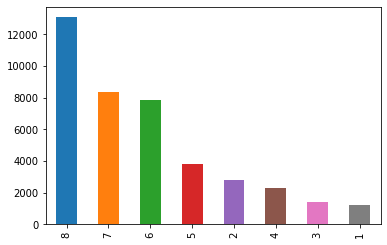

In [26]:
user_statistics_df['window'].value_counts().plot.bar()

In [54]:
def get_user_picture_df(city_id_str,event_day):
    user_picture = get_df_from_csv_table(query_presto(f'''
        select a.user_id, a.city_id, a.gender,a.mobile,a.first_order_time,a.birthday, b.model, b.brand, b.sys_ver
        from
        (select user_id, city_id,birthday, gender, mobile,first_order_time
        from dim.dim_user_info_df
        where city_id in ({citys})
        and gender!=0
        and birthday is not null
        and event_day='{event_day}') a left join
        (select user_id, model, brand, sys_ver
        from dws.dws_pt_user_action_da
        where event_day='{event_day}') b on a.user_id=b.user_id
    '''))

    return user_picture

city_id_str='196'
event_day='20210407'
user_picture_df=get_user_picture_df(city_id_str,event_day)

In [57]:
user_picture_df.shape

(104872, 9)

In [60]:
user_picture_df['age'] = user_picture_df['birthday'].map(lambda x: 2021-int(x[:4])+1)

In [80]:
user_picture_df.head()

,user_id,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age
0,11734583,196,1,13628170259,2019-07-24 21:41:46.000,1974-01-30 00:00:00.000,vivo%20Y79,vivo,Android 7.1.2,48
1,12017264,196,1,19983824868,2019-07-29 07:48:10.000,1987-11-12 00:00:00.000,"iPhone%206%3CiPhone7,2%3E",iPhone,iOS 12.4.9,35
2,12041078,196,2,18228973526,2019-07-29 17:19:13.000,1990-10-21 00:00:00.000,None,None,None,32
3,12143390,196,1,18982310456,2019-07-31 18:03:01.000,1993-08-22 00:00:00.000,None,None,None,29
4,12591013,196,2,18321470770,2019-08-09 11:47:33.000,1994-10-12 00:00:00.000,None,None,None,28


In [88]:
def get_register_span(x):
    time_list=x['first_order_time'][:10].split('-')
    time_span=datetime.date(2021,4,7)-\
                datetime.date(int(time_list[0]),int(time_list[1]),int(time_list[2]))
    time_span=time_span.days+1
    return time_span

user_picture_df['register_span']=user_picture_df.apply(get_register_span,axis=1)

In [89]:
user_picture_df

,user_id,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span
0,11734583,196,1,13628170259,2019-07-24 21:41:46.000,1974-01-30 00:00:00.000,vivo%20Y79,vivo,Android 7.1.2,48,624
1,12017264,196,1,19983824868,2019-07-29 07:48:10.000,1987-11-12 00:00:00.000,"iPhone%206%3CiPhone7,2%3E",iPhone,iOS 12.4.9,35,619
2,12041078,196,2,18228973526,2019-07-29 17:19:13.000,1990-10-21 00:00:00.000,None,None,None,32,619
3,12143390,196,1,18982310456,2019-07-31 18:03:01.000,1993-08-22 00:00:00.000,None,None,None,29,617
4,12591013,196,2,18321470770,2019-08-09 11:47:33.000,1994-10-12 00:00:00.000,None,None,None,28,608
5,12640846,196,1,13881460626,2019-08-10 11:18:38.000,1983-01-23 00:00:00.000,WLZ-AN00,HUAWEI,Android 10,39,607
6,12860464,196,2,15884007563,1970-01-01 08:00:01.000,1993-10-20 00:00:00.000,None,None,None,29,18725
7,13122418,196,2,18981526093,2019-08-18 19:26:26.000,1980-02-14 00:00:00.000,None,None,None,42,599
8,13251190,196,2,13989913307,2019-08-26 22:59:52.000,1992-03-17 00:00:00.000,ANA-TN00,HUAWEI,Android 10,30,591
9,13934305,196,1,13996637273,2019-08-31 20:26:22.000,1986-03-05 00:00:00.000,None,None,None,36,586


In [91]:
user_picture_df[user_picture_df.register_span>10000]

,user_id,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span
6,12860464,196,2,15884007563,1970-01-01 08:00:01.000,1993-10-20 00:00:00.000,None,None,None,29,18725
11,15200890,196,2,18982389706,1970-01-01 08:00:01.000,1987-03-03 00:00:00.000,None,None,None,35,18725
26,21749315,196,2,13795649318,1970-01-01 08:00:01.000,1966-06-07 00:00:00.000,None,None,None,56,18725
74,15261642,196,1,18882073483,1970-01-01 08:00:01.000,1981-11-15 00:00:00.000,None,None,None,41,18725
91,19513338,196,1,13734997313,1970-01-01 08:00:01.000,1998-08-20 00:00:00.000,None,None,None,24,18725
96,23077064,196,2,19115749140,1970-01-01 08:00:01.000,2002-04-18 00:00:00.000,V1901A,vivo,Android 9,20,18725
118,43640549,196,1,18990351679,1970-01-01 08:00:01.000,1987-04-14 00:00:00.000,,Android,Android,35,18725
127,29259658,196,1,13734925516,1970-01-01 08:00:01.000,1965-08-14 00:00:00.000,TEL-AN00,HONOR,Android 10,57,18725
134,34917720,196,1,18783173497,1970-01-01 08:00:01.000,1981-10-27 00:00:00.000,V1829A,vivo,Android 9,41,18725
138,41773399,196,1,13058318690,1970-01-01 08:00:01.000,1994-08-24 00:00:00.000,PCHM10,OPPO,Android 10,28,18725


In [92]:
user_statistics_df.shape

(40894, 4)

In [97]:
merge_df=user_statistics_df.merge(user_picture_df,on='user_id',how='inner')
merge_df.shape

(38367, 14)

In [98]:
merge_df.head()

,user_id,bike_sn,order_60day_avg,window,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span
0,1734281,1,0.016667,8,196,1,13388787001,2021-03-02 15:09:48.000,1993-08-22 00:00:00.000,PCKM80,OPPO,Android 10,29,37
1,1758254,7,0.116667,6,196,2,18687850500,2018-06-17 20:36:39.000,1992-01-24 00:00:00.000,"iPhone%2011%3CiPhone12,1%3E",iPhone,iOS 14.4,30,1026
2,1888917,3,0.050000,7,196,1,18313796696,2018-09-28 15:10:56.000,1985-03-31 00:00:00.000,V2020A,vivo,10,37,923
3,2039255,4,0.066667,7,196,1,18002468770,2018-07-15 00:26:20.000,1999-03-05 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,23,998
4,2044893,9,0.150000,6,196,1,18213356825,2021-03-26 11:16:58.000,1995-10-19 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,27,13


In [100]:
merge_df[merge_df.register_span>1000]

,user_id,bike_sn,order_60day_avg,window,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span
1,1758254,7,0.116667,6,196,2,18687850500,2018-06-17 20:36:39.000,1992-01-24 00:00:00.000,"iPhone%2011%3CiPhone12,1%3E",iPhone,iOS 14.4,30,1026


In [101]:
merge_df['order_60day_avg_true']=merge_df.apply(lambda x:x['bike_sn']/60 if x['register_span']>59 else x['bike_sn']/x['register_span'],axis=1)

In [102]:
merge_df

,user_id,bike_sn,order_60day_avg,window,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span,order_60day_avg_true
0,1734281,1,0.016667,8,196,1,13388787001,2021-03-02 15:09:48.000,1993-08-22 00:00:00.000,PCKM80,OPPO,Android 10,29,37,0.027027
1,1758254,7,0.116667,6,196,2,18687850500,2018-06-17 20:36:39.000,1992-01-24 00:00:00.000,"iPhone%2011%3CiPhone12,1%3E",iPhone,iOS 14.4,30,1026,0.116667
2,1888917,3,0.050000,7,196,1,18313796696,2018-09-28 15:10:56.000,1985-03-31 00:00:00.000,V2020A,vivo,10,37,923,0.050000
3,2039255,4,0.066667,7,196,1,18002468770,2018-07-15 00:26:20.000,1999-03-05 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,23,998,0.066667
4,2044893,9,0.150000,6,196,1,18213356825,2021-03-26 11:16:58.000,1995-10-19 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,27,13,0.692308
5,2177414,7,0.116667,6,196,2,18282810190,2018-07-28 12:44:17.000,1987-09-14 00:00:00.000,V1829A,vivo,Android 10,35,985,0.116667
6,2205068,6,0.100000,6,196,1,15828765321,2018-07-30 21:36:27.000,1983-02-23 00:00:00.000,V2020A,vivo,Android 10,39,983,0.100000
7,2210328,1,0.016667,8,196,1,18882862353,2018-07-31 15:20:26.000,1996-09-14 00:00:00.000,"iPhone%208%20Plus%20(GSM+CDMA)%3CiPhone10,2%3E",iPhone,iOS 14.4.1,26,982,0.016667
8,2322884,11,0.183333,6,196,1,13881585050,2019-04-25 08:30:33.000,1969-10-16 00:00:00.000,PBCM10,OPPO,Android 9,53,714,0.183333
9,2325725,22,0.366667,4,196,1,13881570178,2018-08-09 20:56:50.000,1976-12-14 00:00:00.000,iPhone 11 Pro,Apple,iOS14.4.2,46,973,0.366667


In [103]:
merge_df['window']=merge_df.apply(split_window_func,axis=1)

In [104]:
merge_df

,user_id,bike_sn,order_60day_avg,window,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span,order_60day_avg_true
0,1734281,1,0.016667,8,196,1,13388787001,2021-03-02 15:09:48.000,1993-08-22 00:00:00.000,PCKM80,OPPO,Android 10,29,37,0.027027
1,1758254,7,0.116667,6,196,2,18687850500,2018-06-17 20:36:39.000,1992-01-24 00:00:00.000,"iPhone%2011%3CiPhone12,1%3E",iPhone,iOS 14.4,30,1026,0.116667
2,1888917,3,0.050000,7,196,1,18313796696,2018-09-28 15:10:56.000,1985-03-31 00:00:00.000,V2020A,vivo,10,37,923,0.050000
3,2039255,4,0.066667,7,196,1,18002468770,2018-07-15 00:26:20.000,1999-03-05 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,23,998,0.066667
4,2044893,9,0.150000,6,196,1,18213356825,2021-03-26 11:16:58.000,1995-10-19 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,27,13,0.692308
5,2177414,7,0.116667,6,196,2,18282810190,2018-07-28 12:44:17.000,1987-09-14 00:00:00.000,V1829A,vivo,Android 10,35,985,0.116667
6,2205068,6,0.100000,6,196,1,15828765321,2018-07-30 21:36:27.000,1983-02-23 00:00:00.000,V2020A,vivo,Android 10,39,983,0.100000
7,2210328,1,0.016667,8,196,1,18882862353,2018-07-31 15:20:26.000,1996-09-14 00:00:00.000,"iPhone%208%20Plus%20(GSM+CDMA)%3CiPhone10,2%3E",iPhone,iOS 14.4.1,26,982,0.016667
8,2322884,11,0.183333,6,196,1,13881585050,2019-04-25 08:30:33.000,1969-10-16 00:00:00.000,PBCM10,OPPO,Android 9,53,714,0.183333
9,2325725,22,0.366667,4,196,1,13881570178,2018-08-09 20:56:50.000,1976-12-14 00:00:00.000,iPhone 11 Pro,Apple,iOS14.4.2,46,973,0.366667


<AxesSubplot:>

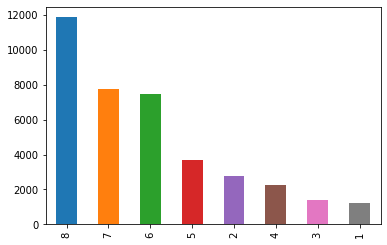

In [105]:
merge_df['window'].value_counts().plot.bar()

In [106]:
merge_df['window'].value_counts()

8    11847
7     7752
6     7461
5     3698
2     2767
4     2244
3     1392
1     1206
Name: window, dtype: int64

In [109]:
def get_age_transform(x):
    if x<20:
        return 1
    elif 20<=x<=24:
        return 2
    elif 25<=x<=29:
        return 3
    elif 30<=x<=34:
        return 4
    elif 35<=x<=39:
        return 5
    elif 40<=x<=44:
        return 6
    else:
        return 7
merge_df['age_transformed']=merge_df.age.apply(get_age_transform)

In [113]:
def get_brand_transform(x):
    if x=='HUAWEI':
        return 1
    elif x=='OPPO':
        return 2
    elif x=='vivo':
        return 3
    elif x=='iPhone' or x=='Apple':
        return 4
    elif x=='HONOR':
        return 5
    else:
        return 6
merge_df['brand_transform']=merge_df.brand.apply(get_brand_transform)

In [153]:
import re
error_lis=[]
def get_sys_ver_transform(x):
    try:
        if re.findall(r'Android \d+',x)[0].split(' ')[-1]=='10' or x=='10':
            return 1
        elif re.findall(r'Android \d+',x)[0].split(' ')[-1]=='9' or x=='9':
            return 2
        elif re.findall(r'Android \d+',x)[0].split(' ')[-1]=='8' or x=='8' or re.findall(r'\d',x)[0]=='8':
            return 3
        elif re.findall(r'iOS\d\d',x)[0][-2:]=='14' or re.findall(r'iOS \d+',x)[0].split(' ')[-1]=='14':
            return 4
        elif re.findall(r'iOS\d\d',x)[0][-2:]=='13' or re.findall(r'iOS \d+',x)[0].split(' ')[-1]=='13':
            return 5
        elif x[:3]=='iOS' or x[:6]=='iPhone':
            return 6
        else:
            return 7
    except:
        error_lis.append(x)
    
merge_df['sys_ver_transformed']=merge_df.sys_ver.apply(get_sys_ver_transform)

In [160]:
import re
# re.search('\d+','5.4.3')[0]
def edit_ver(x):
    try:
        if type(x)==type(0.1):
            return 'None'
        elif re.match('\d+\..*', x):
            return 'Android '+re.search('\d+', x)[0]
        elif re.match('Android \d+\..*', x):
            return 'Android '+re.search('\d+', x)[0]
        elif re.match('Android \d+$', x):
            return x
        elif re.match('iOS \d+$', x):
            return x
        elif re.match('iOS\d+\..*', x):
            return 'iOS '+re.search('\d+',x)[0]
        elif re.match('iOS \d+\..*', x):
            return 'iOS '+re.search('\d+',x)[0]
        elif re.match('\d+$', x):
            return 'Android '+x
        else:
            return 'Other'
    except:
        print(type(x))
merge_df['sys_ver_transformed']=merge_df.sys_ver.apply(edit_ver)    

In [162]:
# print(len(error_lis))
# merge_df.shape
merge_df['sys_ver_transformed'].value_counts()

Android 10    20009
Android 9      4768
iOS 14         4413
Android 8      2880
iOS 13         2031
Android 11     1291
Other           825
Android 7       735
Android 6       523
iOS 12          444
Android 5       222
iOS 11          166
iOS 10           49
iOS 9             7
Android 4         4
Name: sys_ver_transformed, dtype: int64

In [166]:
def get_sys_ver_transform2(x):
    if x[:3]=='iOS':
        if x.split(' ')[-1]=='14':
            return 1
        elif x.split(' ')[-1]=='13':
            return 2
        else:
            return 7
    elif x.split(' ')[-1]=='10':
        return 3
    elif x.split(' ')[-1]=='11':
        return 4
    elif x.split(' ')[-1]=='9':
        return 5
    elif x.split(' ')[-1]=='8':
        return 6
    else:
        return 7
merge_df['sys_ver_transformed2']=merge_df.sys_ver_transformed.apply(get_sys_ver_transform2)   

In [150]:
# re.findall(r'iOS\d+\.\d+','iOS11.0.3')
# re.findall(r'Android \d+','Android 10')[0].split(' ')
# re.findall(r'Android \d+','Android 8.0.0')[0].split(' ')
# re.findall(r'\d','8.1.0')
# re.findall(r'iOS\d\d','iOS11.0.3')[0][-2:]
re.findall(r'iOS \d+','iOS 11.0.3')[0].split(' ')[-1]

'11'

In [167]:
merge_df

,user_id,bike_sn,order_60day_avg,window,city_id,gender,mobile,first_order_time,birthday,model,brand,sys_ver,age,register_span,order_60day_avg_true,age_transformed,brand_transform,sys_ver_transformed,sys_ver_transformed2
0,1734281,1,0.016667,8,196,1,13388787001,2021-03-02 15:09:48.000,1993-08-22 00:00:00.000,PCKM80,OPPO,Android 10,29,37,0.027027,3,2,Android 10,3
1,1758254,7,0.116667,6,196,2,18687850500,2018-06-17 20:36:39.000,1992-01-24 00:00:00.000,"iPhone%2011%3CiPhone12,1%3E",iPhone,iOS 14.4,30,1026,0.116667,4,4,iOS 14,1
2,1888917,3,0.050000,7,196,1,18313796696,2018-09-28 15:10:56.000,1985-03-31 00:00:00.000,V2020A,vivo,10,37,923,0.050000,5,3,Android 10,3
3,2039255,4,0.066667,7,196,1,18002468770,2018-07-15 00:26:20.000,1999-03-05 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,23,998,0.066667,2,4,iOS 13,2
4,2044893,9,0.150000,6,196,1,18213356825,2021-03-26 11:16:58.000,1995-10-19 00:00:00.000,"iPhone%20X%20(GSM+CDMA)%3CiPhone10,3%3E",iPhone,iOS 13.6,27,13,0.692308,3,4,iOS 13,2
5,2177414,7,0.116667,6,196,2,18282810190,2018-07-28 12:44:17.000,1987-09-14 00:00:00.000,V1829A,vivo,Android 10,35,985,0.116667,5,3,Android 10,3
6,2205068,6,0.100000,6,196,1,15828765321,2018-07-30 21:36:27.000,1983-02-23 00:00:00.000,V2020A,vivo,Android 10,39,983,0.100000,5,3,Android 10,3
7,2210328,1,0.016667,8,196,1,18882862353,2018-07-31 15:20:26.000,1996-09-14 00:00:00.000,"iPhone%208%20Plus%20(GSM+CDMA)%3CiPhone10,2%3E",iPhone,iOS 14.4.1,26,982,0.016667,3,4,iOS 14,1
8,2322884,11,0.183333,6,196,1,13881585050,2019-04-25 08:30:33.000,1969-10-16 00:00:00.000,PBCM10,OPPO,Android 9,53,714,0.183333,7,2,Android 9,5
9,2325725,22,0.366667,4,196,1,13881570178,2018-08-09 20:56:50.000,1976-12-14 00:00:00.000,iPhone 11 Pro,Apple,iOS14.4.2,46,973,0.366667,7,4,iOS 14,1


In [ ]:
'sys_ver_transformed2','brand_transform','age_transformed','gender'

In [168]:
'''
    极光特征
'''
jiguang_df=pd.read_csv('iaudience.csv').rename({'imei/phone/mac/imsi':'mobile'},axis=1)

In [208]:
merge_df['mobile']=merge_df['mobile'].astype('int')
jg_sg_df=pd.merge(jiguang_df,merge_df,on='mobile',how='left')

In [209]:
def get_SOM_OCM_CAREER_transform(x):
    if x=='企业人员':
        return 1
    elif x=='白领':
        return 2
    elif x=='公务人员':
        return 3
    else:
        return 4
jg_sg_df['SOM_OCM_CAREER_transformed']=jg_sg_df.SOM_OCM_CAREER.apply(get_SOM_OCM_CAREER_transform)

In [172]:
# jg_sg_df['SOM_OCM_CAREER'].value_counts()

企业人员       5477
白领         2850
其他         2548
公务人员        897
银行职员        570
建筑人员        484
老师          341
个人店主        270
派送员         225
司机          174
保险代理人       166
警务人员        142
会计          130
医生           90
涉农人员         58
销售人员         53
退休           49
港口工作人员       39
IT从业者        14
律师            4
汽车站工作人员       2
火车站工作人员       1
人力资源人员        1
Name: SOM_OCM_CAREER, dtype: int64

In [210]:
jg_sg_df=jg_sg_df.fillna('None')

In [211]:
transform_list=['CPL_INDM_EDU_LEVEL',
              'CPL_INDM_MARRC2',
              'FIM_FISM_INCL',
              'FIM_FISM_CONL_CIR']
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
lis=[]
for col in transform_list:
    try:
        jg_sg_df[col+'_transformed'] = lbl.fit_transform(jg_sg_df[col].astype('category'))
    except:
        lis.append(col)

In [212]:
hobby_list=[
'APP_HOBY_SHORT_VIDEO',
'APP_HOBY_SUMMARY_VIDEO' ,
'APP_HOBY_SELF_PHOTO' ,
'APP_HOBY_SUNMMARY_NEWS' ,
'APP_HOBY_SPEED_GAME',
'APP_HOBY_WIFI',
'APP_HOBY_FOOD',
'APP_HOBY_RECORD',
'APP_HOBY_HOT_SOCIAL' ,
'APP_HOBY_ONLINE_STUDY' ,
'APP_HOBY_ZONGHE_SHOPPING' ,
'APP_HOBY_DISCOUNT_MARKET' ,
'APP_HOBY_GROUP_BUY' ,
'APP_HOBY_SMOTE_OFFICE'
                 ]

In [213]:
import re
def edit_app_hoby(x):

    if x=="None":
        return 0
    else:
        return float(re.findall(r'\d+\.\d+',x)[0])


In [214]:
jg_sg_df['APP_HOBY_SHORT_VIDEO']=jg_sg_df.APP_HOBY_SHORT_VIDEO.map(edit_app_hoby)
jg_sg_df['APP_HOBY_ZONGHE_SHOPPING']=jg_sg_df.APP_HOBY_ZONGHE_SHOPPING.map(edit_app_hoby)
jg_sg_df['APP_HOBY_DISCOUNT_MARKET']=jg_sg_df.APP_HOBY_DISCOUNT_MARKET.map(edit_app_hoby)
jg_sg_df['APP_HOBY_GROUP_BUY']=jg_sg_df.APP_HOBY_GROUP_BUY.map(edit_app_hoby)
jg_sg_df['APP_HOBY_SUMMARY_VIDEO']=jg_sg_df.APP_HOBY_SUMMARY_VIDEO.map(edit_app_hoby)
jg_sg_df['APP_HOBY_SELF_PHOTO']=jg_sg_df.APP_HOBY_SELF_PHOTO.map(edit_app_hoby)
jg_sg_df['APP_HOBY_SUNMMARY_NEWS']=jg_sg_df.APP_HOBY_SUNMMARY_NEWS.map(edit_app_hoby)
jg_sg_df['APP_HOBY_SPEED_GAME']=jg_sg_df.APP_HOBY_SPEED_GAME.map(edit_app_hoby)
jg_sg_df['APP_HOBY_WIFI']=jg_sg_df.APP_HOBY_WIFI.map(edit_app_hoby)
jg_sg_df['APP_HOBY_FOOD']=jg_sg_df.APP_HOBY_FOOD.map(edit_app_hoby)
jg_sg_df['APP_HOBY_RECORD']=jg_sg_df.APP_HOBY_RECORD.map(edit_app_hoby)
jg_sg_df['APP_HOBY_HOT_SOCIAL']=jg_sg_df.APP_HOBY_HOT_SOCIAL.map(edit_app_hoby)
jg_sg_df['APP_HOBY_ONLINE_STUDY']=jg_sg_df.APP_HOBY_ONLINE_STUDY.map(edit_app_hoby)

In [219]:
jg_sg_df['APP_HOBY_SMOTE_OFFICE']=jg_sg_df.APP_HOBY_SMOTE_OFFICE.map(edit_app_hoby)

# 复合特征拆分

In [221]:
# jg_sg_df['GBM_BHM_PURB_CONP']
catagories_set = set()
for row in jg_sg_df['GBM_BHM_PURB_CONP']:
    catagories_set |= set(row.split('、'))
catagories_set.discard("")    
catagories_set.discard("None")
catagories = list(catagories_set)
catagories_df = pd.DataFrame(columns=catagories)

jg_sg_df2=jg_sg_df.join(catagories_df,how='outer')

for col in catagories:
    jg_sg_df2[col] = jg_sg_df2['GBM_BHM_PURB_CONP'].apply(lambda x: 1 if col in x.split('、') else 0)
    

''' '数码电脑 5793'、"N 8309"、'图书专卖 4279'、'品牌折扣 9739' '''

' \'数码电脑 5793\'、"N 8309"、\'图书专卖 4279\'、\'品牌折扣 9739\' '

In [226]:
col_feat=['sys_ver_transformed2','brand_transform','age_transformed','gender',
              'SOM_OCM_CAREER_transformed','CPL_INDM_EDU_LEVEL_transformed',
              'CPL_INDM_MARRC2_transformed',
              'FIM_FISM_INCL_transformed',
              'FIM_FISM_CONL_CIR_transformed',
              'APP_HOBY_SHORT_VIDEO',
                'APP_HOBY_SUMMARY_VIDEO' ,
                'APP_HOBY_SELF_PHOTO' ,
                'APP_HOBY_SUNMMARY_NEWS' ,
                'APP_HOBY_SPEED_GAME',
                'APP_HOBY_WIFI',
                'APP_HOBY_FOOD',
                'APP_HOBY_RECORD',
                'APP_HOBY_HOT_SOCIAL' ,
                'APP_HOBY_ONLINE_STUDY' ,
                'APP_HOBY_ZONGHE_SHOPPING' ,
                'APP_HOBY_DISCOUNT_MARKET' ,
                'APP_HOBY_GROUP_BUY' ,
                'APP_HOBY_SMOTE_OFFICE',
                'N',
                '品牌折扣','window'
             ]

In [223]:
def edit_query_result(x):
    if x=='查询标签成功-有标签':
        return 1
    else:
        return 0

In [227]:
jg_sg_df2[col_feat]

,sys_ver_transformed2,brand_transform,age_transformed,gender,SOM_OCM_CAREER_transformed,CPL_INDM_EDU_LEVEL_transformed,CPL_INDM_MARRC2_transformed,FIM_FISM_INCL_transformed,FIM_FISM_CONL_CIR_transformed,APP_HOBY_SHORT_VIDEO,APP_HOBY_SUMMARY_VIDEO,APP_HOBY_SELF_PHOTO,APP_HOBY_SUNMMARY_NEWS,APP_HOBY_SPEED_GAME,APP_HOBY_WIFI,APP_HOBY_FOOD,APP_HOBY_RECORD,APP_HOBY_HOT_SOCIAL,APP_HOBY_ONLINE_STUDY,APP_HOBY_ZONGHE_SHOPPING,APP_HOBY_DISCOUNT_MARKET,APP_HOBY_GROUP_BUY,APP_HOBY_SMOTE_OFFICE,N,品牌折扣,window
0,3,1,6,2,1,3,1,2,1,0.1440,0.1980,0.2000,0.0000,0.0000,0.1543,0.0000,0.0000,0.1255,0.1452,0.1392,0.1338,0.0000,0.1339,1,0,5
1,3,2,7,2,4,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,7
2,3,3,3,2,4,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,6
3,3,3,7,2,1,1,1,0,0,0.7589,0.7166,0.7751,0.7685,0.0000,0.7407,0.7394,0.7070,0.7884,0.0000,0.7807,0.0000,0.0001,0.7364,0,0,7
4,5,3,2,2,2,3,2,2,2,0.1967,0.1724,0.1596,0.1987,0.1104,0.1750,0.1727,0.1768,0.1112,0.0000,0.1625,0.1687,0.0000,0.1367,1,1,4
5,6,2,7,1,1,2,2,1,2,0.0000,0.9954,1.0000,0.0000,0.0000,0.9940,0.0000,0.0000,0.9909,0.0000,0.0000,0.0000,0.0000,0.9976,0,0,5
6,7,3,2,2,4,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,2
7,None,None,None,None,4,2,1,0,0,0.4935,0.4538,0.4909,0.4718,0.4573,0.0000,0.4980,0.4430,0.4666,0.4363,0.4382,0.4717,0.0000,0.4407,1,1,None
8,7,2,3,1,4,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,8
9,5,6,4,1,4,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,8


In [228]:
jg_sg_df2= jg_sg_df2[jg_sg_df2.window!="None"]
jg_sg_df2['query_result']=jg_sg_df2.查询结果.map(edit_query_result)
jg_sg_df2=jg_sg_df2[jg_sg_df2.query_result==1]

In [230]:
jg_sg_df2.shape

(14759, 432)

In [232]:
jg_sg_df2['pref']=jg_sg_df2.window.map(lambda x:1 if x>=5 else 0)

In [242]:
jg_sg_df2['sys_ver_transformed2']=jg_sg_df2['sys_ver_transformed2'].astype('int')
jg_sg_df2['age_transformed']=jg_sg_df2['age_transformed'].astype('int')
jg_sg_df2['brand_transform']=jg_sg_df2['brand_transform'].astype('int')
jg_sg_df2['gender']=jg_sg_df2['gender'].astype('int')

In [248]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

temp = jg_sg_df2

col_feat_tmp = col_feat
# col_feat_tmp.remove('window')

col_ans = 'pref'

kf = KFold(n_splits=8,shuffle=True)
r0 = []
r1 = []
m0 = []
m1 = []
f = 0
# citys = list(temp.city_id.unique())
train_X,test_X,train_y,test_y =train_test_split(temp[col_feat_tmp],temp[col_ans],test_size=0.3)


# dtrain = xgb.DMatrix(train_X,test_X)
num_rounds = 100

model = XGBClassifier(
                     booster= 'gbtree',
                    objective='binary:logistic',
                    gamma= 0.1349319866098618,
                    max_depth= 4,
#                         reg_lambda= 3,
                    subsample= 0.7769258669266205,
                    colsample_bytree= 0.8251518366190885,
                    min_child_weight= 1,
                    eta=0.013312868125031425,
                    seed=1000,
                    nthread= 4,
                    n_estimators=190,
#                     silent=0 

)


# dtest = xgb.DMatrix(train_y,test_y)
model.fit(train_X, train_y, eval_metric=["auc"],eval_set=[(test_X,test_y)],early_stopping_rounds=30,verbose=True)

pred = model.predict(test_X)
pred = [round(value) for value in pred]

accuracy = accuracy_score(test_y, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# model=xgb.train(params, dtrain, num_rounds, [(dtest, 'eval'), (dtrain,'train')])



[0]	validation_0-auc:0.53677
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.54912
[2]	validation_0-auc:0.55572
[3]	validation_0-auc:0.56050
[4]	validation_0-auc:0.55824
[5]	validation_0-auc:0.55718
[6]	validation_0-auc:0.55500
[7]	validation_0-auc:0.55520
[8]	validation_0-auc:0.55618
[9]	validation_0-auc:0.55781
[10]	validation_0-auc:0.55934
[11]	validation_0-auc:0.56068
[12]	validation_0-auc:0.56026
[13]	validation_0-auc:0.55909
[14]	validation_0-auc:0.55925
[15]	validation_0-auc:0.56005
[16]	validation_0-auc:0.56041
[17]	validation_0-auc:0.56024
[18]	validation_0-auc:0.56146
[19]	validation_0-auc:0.56230
[20]	validation_0-auc:0.56316
[21]	validation_0-auc:0.56290
[22]	validation_0-auc:0.56281
[23]	validation_0-auc:0.56232
[24]	validation_0-auc:0.56388
[25]	validation_0-auc:0.56303
[26]	validation_0-auc:0.56414
[27]	validation_0-auc:0.56476
[28]	validation_0-auc:0.56473
[29]	validation_0-auc:0.56478
[30]	validation_0-auc:0.56497
[31]	validation_

In [249]:
col_feat_tmp

['sys_ver_transformed2',
 'brand_transform',
 'age_transformed',
 'gender',
 'SOM_OCM_CAREER_transformed',
 'CPL_INDM_EDU_LEVEL_transformed',
 'CPL_INDM_MARRC2_transformed',
 'FIM_FISM_INCL_transformed',
 'FIM_FISM_CONL_CIR_transformed',
 'APP_HOBY_SHORT_VIDEO',
 'APP_HOBY_SUMMARY_VIDEO',
 'APP_HOBY_SELF_PHOTO',
 'APP_HOBY_SUNMMARY_NEWS',
 'APP_HOBY_SPEED_GAME',
 'APP_HOBY_WIFI',
 'APP_HOBY_FOOD',
 'APP_HOBY_RECORD',
 'APP_HOBY_HOT_SOCIAL',
 'APP_HOBY_ONLINE_STUDY',
 'APP_HOBY_ZONGHE_SHOPPING',
 'APP_HOBY_DISCOUNT_MARKET',
 'APP_HOBY_GROUP_BUY',
 'APP_HOBY_SMOTE_OFFICE',
 'N',
 '品牌折扣']

In [252]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from xgboost import plot_importance, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
temp=jg_sg_df2

col_feature = col_feat_tmp


col_label = 'pref'

kf = KFold(n_splits=5,shuffle=True)
r0 = []
r1 = []
m0 = []
m1 = []
f = 0
# citys = list(temp.city_id.unique())

# for train_index, test_index in kf.split(temp):
# f+=1
# train = temp.iloc[train_index]
# test = temp.iloc[test_index]

train_X,test_X,train_y,test_y =train_test_split(temp[col_feature],temp[col_label],test_size=0.3)


params = {
    'booster': 'gbtree',          #使用不同的booster
    'objective': 'binary:logistic', 
        'gamma': 0.1,             #默认0，min_split_loss 树的叶节点进一步分区所需最小损失 [0,∞]
    'max_depth': 5,               #默认6 一棵树的最大深度，越大越易过拟合   [0,∞]
        'reg_lambda': 10,         #默认1 L2正则项，越大模型越保守
    'subsample': 0.6,             #默认1 训练实例的子样本比例  0.5意味着XGBoost将在树木生长之前随机采样一半的训练数据,可防止过拟合 (0,1]
    'colsample_bytree': 0.6,      #默认1 用于列二次采样的参数  (0,1]
    'min_child_weight': 1,        #默认1 子级中实例重量的最小总和（hessian）。越大算法将越保守。 [0,∞]
    'eta': 0.01,                  #默认0.3 学习率   [0,1]
    'seed': 1000,
    'nthread': 4,
     'eval_metric':['auc','error'],
#     'alpha': 5
}

dtrain = xgb.DMatrix(train_X, train_y)
dtest = xgb.DMatrix(test_X, test_y)
num_rounds = 150
plst = params.items()
#model = XGBClassifier(params)
model=xgb.train(params, dtrain, num_rounds, [(dtest, 'eval'), (dtrain,'train')])
#model.fit(X, y, early_stopping_rounds=20, eval_metric="auc", eval_set=[(test[col_feat],test[col_ans])], verbose=True)
#pred = model.predict(test[col_feat])
#pred = [round(value) for value in pred]
#     accuracy = accuracy_score(test[col_ans], pred)
#     print("Accuracy: %.2f%%" % (accuracy * 100.0))
    

[0]	eval-auc:0.51557	eval-error:0.20596	train-auc:0.52952	train-error:0.20085
[1]	eval-auc:0.51566	eval-error:0.20641	train-auc:0.52975	train-error:0.20027
[2]	eval-auc:0.51566	eval-error:0.20574	train-auc:0.52975	train-error:0.20047
[3]	eval-auc:0.53286	eval-error:0.20574	train-auc:0.55281	train-error:0.20047
[4]	eval-auc:0.53697	eval-error:0.20574	train-auc:0.55538	train-error:0.20047
[5]	eval-auc:0.53853	eval-error:0.20574	train-auc:0.56356	train-error:0.20047
[6]	eval-auc:0.53941	eval-error:0.20574	train-auc:0.56453	train-error:0.20047
[7]	eval-auc:0.53972	eval-error:0.20574	train-auc:0.56428	train-error:0.20047
[8]	eval-auc:0.53951	eval-error:0.20574	train-auc:0.56457	train-error:0.20047
[9]	eval-auc:0.53923	eval-error:0.20574	train-auc:0.56795	train-error:0.20047
[10]	eval-auc:0.53990	eval-error:0.20574	train-auc:0.56710	train-error:0.20047
[11]	eval-auc:0.54075	eval-error:0.20574	train-auc:0.56601	train-error:0.20047
[12]	eval-auc:0.53806	eval-error:0.20574	train-auc:0.56638	tra

[104]	eval-auc:0.54860	eval-error:0.20574	train-auc:0.62288	train-error:0.20047
[105]	eval-auc:0.54828	eval-error:0.20574	train-auc:0.62322	train-error:0.20047
[106]	eval-auc:0.54807	eval-error:0.20574	train-auc:0.62386	train-error:0.20047
[107]	eval-auc:0.54797	eval-error:0.20574	train-auc:0.62408	train-error:0.20047
[108]	eval-auc:0.54821	eval-error:0.20574	train-auc:0.62497	train-error:0.20047
[109]	eval-auc:0.54812	eval-error:0.20574	train-auc:0.62555	train-error:0.20047
[110]	eval-auc:0.54801	eval-error:0.20574	train-auc:0.62616	train-error:0.20047
[111]	eval-auc:0.54827	eval-error:0.20574	train-auc:0.62621	train-error:0.20047
[112]	eval-auc:0.54863	eval-error:0.20574	train-auc:0.62667	train-error:0.20047
[113]	eval-auc:0.54888	eval-error:0.20574	train-auc:0.62733	train-error:0.20047
[114]	eval-auc:0.54888	eval-error:0.20574	train-auc:0.62768	train-error:0.20047
[115]	eval-auc:0.54887	eval-error:0.20574	train-auc:0.62804	train-error:0.20047
[116]	eval-auc:0.54848	eval-error:0.2057